In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
scores = pd.read_csv('pd_data/judge_scores.csv')

/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# scores = scores[scores.overall_rank < scores.num_entries * 0.67]

In [4]:
country_pairs = scores.apply(lambda row: row.country + row.judge_country, axis=1)

In [26]:
seen = country_pairs.unique()

In [27]:
len(seen)

1173

In [28]:
possible = set()
for skater_country in scores.country.unique():
    for judge_country in scores.judge_country.unique():
        possible.add(skater_country + judge_country)

In [29]:
len(possible)

1886

In [30]:
len(scores) / 1173

146

In [3]:
scores['judge_skater_country'] = scores.apply(lambda row: row.judge_country + row.country, axis=1)

In [4]:
scores['same_country'] = scores.apply(lambda row: 1 if row.country == row.judge_country else 0, axis=1)

In [5]:
goes = scores[scores.is_comp == 0]
comp = scores[scores.is_comp == 1]

In [8]:
len(comp.judge_skater_country.unique())

1528

In [6]:
keep = set(comp.judge_skater_country.value_counts().index[:184])

In [7]:
comp_trim = comp[comp.judge_skater_country.isin(keep)]

In [8]:
judge_keep = set(comp_trim.judge.value_counts().index[:154])

In [9]:
comp_trim = comp_trim[comp_trim.judge.isin(judge_keep)]

In [10]:
comp_trim = comp_trim[comp_trim.judge_score > 1.]

In [70]:
# comp_trim = comp_trim[comp_trim.segment_rank <= 3.]

In [11]:
comp_trim['uid'] = comp_trim.apply(lambda row: row.elt_name + row.skater + row.segment_name, axis=1)

In [12]:
quality = ols('judge_score ~ C(uid, Treatment) + C(judge, Treatment)', data=comp_trim).fit()

In [13]:
quality.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            judge_score   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     49.58
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:23:51   Log-Likelihood:                -19339.
No. Observations:               52358   AIC:                         5.411e+04
Df Residuals:                   44640   BIC:                         1.225e+05
Df Model:                        7717                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================================================
                                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                               5.9835      0.193     31.062      0.000       5.606       6.361
C(uid, Treatment)[T.CompositionAbzal RAKIMGALIEVfc2018_men_short]                                       0.1250      0.268      0.466      0.641      -0.400       0.650
C(uid, Treatment)[T.CompositionAdam RIPPONgpf1617_men_free]                                             2.8208      0.228     12.361      0.000       2.374       3.268
C(uid, Treatment)[T.CompositionAdam RIPPONgpf1617_men_short]                                            2.7375      0.228     11.996      0.000       2.290       3.185
C(uid, Treatment)[T.CompositionAdam RIPPONgpf1718_men_free]                                             3.2157      0.228     14.089      0.000       2.768       3.663
C(uid, Treatment)[T.CompositionAdam RIPPONgpf1718_men_short]                                            3.1602      0.228     13.846      0.000       2.713       3.608
C(uid, Treatment)[T.CompositionAdam RIPPONgpfra2016_men_free]                                           3.0367      0.232     13.066      0.000       2.581       3.492
C(uid, Treatment)[T.CompositionAdam RIPPONgpfra2016_men_short]                                          2.7867      0.232     11.990      0.000       2.331       3.242
C(uid, Treatment)[T.CompositionAdam RIPPONgpjpn2017_men_free]                                           2.9404      0.233     12.639      0.000       2.484       3.396
C(uid, Treatment)[T.CompositionAdam RIPPONgpjpn2017_men_short]                                          2.8154      0.233     12.102      0.000       2.359       3.271
C(uid, Treatment)[T.CompositionAdam RIPPONgpusa2016_men_free]                                           2.9802      0.232     12.820      0.000       2.525       3.436
C(uid, Treatment)[T.CompositionAdam RIPPONgpusa2016_men_short]                                          2.9177      0.232     12.551      0.000       2.462       3.373
C(uid, Treatment)[T.CompositionAdam RIPPONgpusa2017_men_free]                                           3.2382      0.228     14.189      0.000       2.791       3.686
C(uid, Treatment)[T.CompositionAdam RIPPONgpusa2017_men_short]                                          3.1827      0.228     13.946      0.000       2.735       3.630
C(uid, Treatment)[T.CompositionAdel TANKOVA / Ronald ZILBERBERGec2018_ice_dance_short]                 -0.6623      0.424     -1.561      0.119      -1.494       0.169
C(uid, Treatment)[T.CompositionAdele MORRISON / Demid ROKAC

In [14]:
import pickle

In [ ]:
with open('quality.pickle', 'w') as f:
    pickle.dump(quality, f)

In [93]:
skater_judge = ols('judge_score ~ C(skater, Treatment) + C(judge, Treatment)', data=comp).fit()

In [94]:
skater_judge.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            judge_score   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     987.3
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:23:25   Log-Likelihood:                -59537.
No. Observations:               89105   AIC:                         1.202e+05
Df Residuals:                   88525   BIC:                         1.257e+05
Df Model:                         579                                         
Covariance Type:            nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                6.1718      0.055    111.957      0.000       6.064       6.280
C(skater, Treatment)[T.Adam RIPPON]                                      2.9794      0.054     54.746      0.000       2.873       3.086
C(skater, Treatment)[T.Adel TANKOVA / Ronald ZILBERBERG]                -0.5335      0.071     -7.462      0.000      -0.674      -0.393
C(skater, Treatment)[T.Adele MORRISON / Demid ROKACHEV]                 -1.2353      0.071    -17.280      0.000      -1.375      -1.095
C(skater, Treatment)[T.Aimee BUCHANAN]                                  -1.1006      0.072    -15.370      0.000      -1.241      -0.960
C(skater, Treatment)[T.Aiza MAMBEKOVA]                                  -0.2405      0.072     -3.351      0.001      -0.381      -0.100
C(skater, Treatment)[T.Alaine CHARTRAND]                                 1.5147      0.055     27.760      0.000       1.408       1.622
C(skater, Treatment)[T.Alena LEONOVA]                                    1.6885      0.058     28.968      0.000       1.574       1.803
C(skater, Treatment)[T.Alexa SCIMECA KNIERIM / Chris KNIERIM]            2.2207      0.056     39.339      0.000       2.110       2.331
C(skater, Treatment)[T.Alexander BOROVOJ]                               -0.5824      0.087     -6.670      0.000      -0.754      -0.411
C(skater, Treatment)[T.Alexander MAJOROV]                                1.3990      0.055     25.311      0.000       1.291       1.507
C(skater, Treatment)[T.Alexander MASZLJANKO]                            -0.4557      0.088     -5.202      0.000      -0.627      -0.284
C(skater, Treatment)[T.Alexander PETROV]                                 1.6421      0.058     28.199      0.000       1.528       1.756
C(skater, Treatment)[T.Alexander SAMARIN]                                2.0882      0.056     36.988      0.000       1.978       2.199
C(skater, Treatment)[T.Alexandra NAZAROVA / Maxim NIKITIN]               1.8882      0.056     34.018      0.000       1.779       1.997
C(skater, Treatment)[T.Alexandra PAUL / Mitchell ISLAM]                  1.7702      0.072     24.740      0.000       1.630       1.910
C(skater, Treatment)[T.Alexandra STEPANOVA / Ivan BUKIN]                 3.0493      0.054     56.314      0.000       2.943       3.155
C(skater, Treatment)[T.Alexei BYCHENKO]                                  2.2234      0.054     41.238      0.000       2.118       2.329
C(skater, Treatment)[T.Alexia PAGANINI]                                  0.4276      0.072      5.964      0.000       0.287       0.568
C(skater, Treatment)[T.Alicia PINEAULT]                              

In [73]:
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sm.stats.het_breuschpagan(skater_judge.resid, skater_judge.model.exog)
zip(name, test)

[('Lagrange multiplier statistic', 1982.9675733275742),
 ('p-value', 3.6664485119151038e-275),
 ('f-value', 9.5740756351537026),
 ('f p-value', 3.9712627445653009e-297)]

In [74]:
sm.stats.diagnostic.kstest_normal(skater_judge.resid)

(0.027391105331870613, 2.0934369146384404e-31)

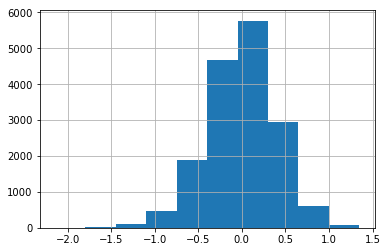

In [75]:
skater_judge.resid.hist()

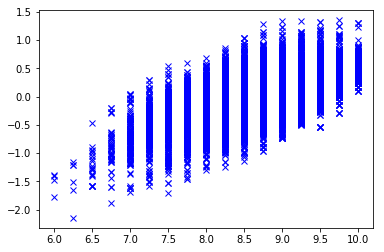

In [76]:
plt.plot(skater_judge.model.endog, skater_judge.resid, 'bx')

In [89]:
skater_judge_country = ols(
    'judge_score ~ C(skater, Treatment) + C(judge, Treatment) + C(same_country, Treatment)',
    data=comp_trim).fit()

In [90]:
skater_judge_country.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            judge_score   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     666.1
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:17:02   Log-Likelihood:                -32600.
No. Observations:               52358   AIC:                         6.595e+04
Df Residuals:                   51985   BIC:                         6.925e+04
Df Model:                         372                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                              5.9507      0.080     74.004      0.000       5.793       6.108
C(skater, Treatment)[T.Adam RIPPON]                                    3.0873      0.075     41.099      0.000       2.940       3.235
C(skater, Treatment)[T.Adel TANKOVA / Ronald ZILBERBERG]              -0.6017      0.216     -2.792      0.005      -1.024      -0.179
C(skater, Treatment)[T.Adele MORRISON / Demid ROKACHEV]               -1.0400      0.097    -10.693      0.000      -1.231      -0.849
C(skater, Treatment)[T.Aimee BUCHANAN]                                -0.3885      0.216     -1.801      0.072      -0.811       0.034
C(skater, Treatment)[T.Aiza MAMBEKOVA]                                -0.3383      0.103     -3.277      0.001      -0.541      -0.136
C(skater, Treatment)[T.Alaine CHARTRAND]                               1.6301      0.075     21.622      0.000       1.482       1.778
C(skater, Treatment)[T.Alena LEONOVA]                                  1.8160      0.078     23.334      0.000       1.663       1.969
C(skater, Treatment)[T.Alexa SCIMECA KNIERIM / Chris KNIERIM]          2.3223      0.077     30.262      0.000       2.172       2.473
C(skater, Treatment)[T.Alexander PETROV]                               1.7409      0.078     22.316      0.000       1.588       1.894
C(skater, Treatment)[T.Alexander SAMARIN]                              2.3518      0.079     29.837      0.000       2.197       2.506
C(skater, Treatment)[T.Alexandra PAUL / Mitchell ISLAM]                1.9144      0.091     21.051      0.000       1.736       2.093
C(skater, Treatment)[T.Alexandra STEPANOVA / Ivan BUKIN]               3.1834      0.076     42.113      0.000       3.035       3.332
C(skater, Treatment)[T.Alexei BYCHENKO]                                2.4027      0.080     30.045      0.000       2.246       2.559
C(skater, Treatment)[T.Alicia PINEAULT]                                0.8150      0.089      9.138      0.000       0.640       0.990
C(skater, Treatment)[T.Alina ZAGITOVA]                                 2.9264      0.077     37.836      0.000       2.775       3.078
C(skater, Treatment)[T.Alisa EFIMOVA / Alexander KOROVIN]              1.1814      0.087     13.539      0.000       1.010       1.352
C(skater, Treatment)[T.Aljona SAVCHENKO / Bruno MASSOT]                3.6887      0.077     47.882      0.000       3.538       3.840
C(skater, Treatment)[T.Alla LOBODA / Pavel DROZD]                      2.0659      0.081     25.629      0.000       1.908       2.224
C(skater, Treatment)[T.Amber GLENN]                                    1.2914      0.089     14.538      0.000   

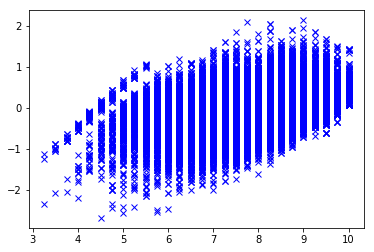

In [92]:
plt.plot(skater_judge_country.model.endog, skater_judge_country.resid, 'bx')

In [30]:
sm.stats.anova_lm(skater_judge, skater_judge_country)

/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,51986.0,11043.748206,0.0,NaN,NaN,NaN
1,51850.0,10357.771068,136.0,685.977138,25.249524,0.0
